Miembros: Juan Manuel Marín, Juan Pablo Leal y David Felipe Cardenas.

Parte I.
Escoger un problema en el que puedan aplicar al menos dos (2) los temas tratados en clase:

Análisis Trabajo Escrito Final

El objetivo del presente trabajo es la creación de un algoritmo, a través de la herramienta de programación Colab, cuyo desarrollo principal se basará en el análisis el índice S&P 500, específicos, entre los cuales se trabajarán riesgo y retorno definido como Beta. 

Para cada activo, se realizará un estudio de las acciones, entre las cuales se encuentran los diferentes activos representativos del índice S&P 500, con el método de programación de clusterisacion, dentro de las cuales nos permite dividir las acciones con riesgo alto, medio, bajo para que los inversionistas puedan escoger de manera equilibrada las acciones para invertir tomando como punto de partida el riesgo que están dispuestos a asumir, junto con series de tiempo y métodos de histogramas que serán definidos mas adelante para comprobar dichos resultados.

Su propósito es ayudar a los inversionistas con pocos conocimientos financieros y les permita entender de manera sencilla cuales acciones merecen una inversión y evitar inversiones por emociones generadas por una coyuntura.
Por otro lado, también es importante un análisis básico de las variables que se utilizaran para el desarrollo y ayudar a la comprensión del inversionista frente al proyecto presentado, con la definición de términos como Beta y Riesgo, para posteriormente, hacer un análisis de los resultados.

Beta se utilizará como una medida de la sensibilidad de los activos financieros al índice de referencia relevante, es decir, la rentabilidad de los activos financieros escogidos, durante el un periodo especifico 01/01/2015 a 01/01/2022, un beta de 7 años.

Condicionado al índice de referencia, el valor beta resultante puede variar considerablemente. Beta no debe confundirse con la desviación estándar: la medida preferida del "riesgo" de un activo financiero.

Beta se calcula como la covarianza de un activo financiero con su índice de referencia, dividida por la varianza del índice de referencia. Dado que la industria de las finanzas gravita hacia las actividades generadoras de rentabilidad, normalmente se utilizan las rentabilidades históricas en los cálculos de los valores Beta. Dichos valores beta cambian con el tiempo. Los valores Beta también varían, dependiendo del período de tiempo utilizado para calcular un valor Beta. 

Por otra parte, en finanzas, el riesgo se define a menudo como una incertidumbre cuantificable sobre ganancias y pérdidas.
El riesgo financiero surge de la incertidumbre sobre los rendimientos financieros. Incluye riesgo de mercado, riesgo de crédito, riesgo de liquidez y riesgo operacional. De igual forma el riesgo es la posibilidad de que el rendimiento real de una inversión sea diferente del rendimiento esperado.

El modelado de riesgo financiero por medio de clusters riesgo retorno, el cual será aplicado en este trabajo, determina el riesgo agregado en una cartera financiera. La teoría moderna de la cartera mide el riesgo utilizando la varianza de los precios de los activos.



1. ¿Qué pregunta(s) responden a partir de esta aplicación?

¿Qué compone un índice?

Un índice puede estar compuesto por diferentes tipos de acciones en temáticas de riesgo, tomando como punto de partida las betas compuestas por el histórico de retornos en un periodo de tiempo específicos. Desarrollado con el objetivo de analizar el comportamiento de un activo como punto principal su riesgo y su retorno, para de esta forma identificar cuales activos son óptimos para la creación de una cartera de inversiones con el fin de satisfacer los requerimientos de cada inversionista.


 ¿Cómo analizar de forma clara los resultados del análisis riesgo retorno?
 
Una excelente forma de evidenciar estos análisis son los histogramas, creados a partir de clusters.
De igual forma la creación de histogramas, que se pueden definir como una forma grafica que demuestra la distribución de los retornos, los cuales son directamente proporcionales al riesgo, es decir, entre más riesgo más retorno. Al igual muestra los sesgos de los activos, ya sea a la izquierda, bajo riesgo, a la derecha alto riesgo.

Parte II. 

1. Implementar el paso a paso en el Colab para resolver el problema propuesto.

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 22.5 MB/s 
     |████████████████████████████████| 63 kB 559 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np 
import io
import requests
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime
import yfinance as yf
import random

from sklearn import datasets
from scipy.spatial import distance
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, normalize
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from matplotlib.patches import Ellipse, Polygon
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import Normalizer
import matplotlib.patches as patches
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import *
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from matplotlib import gridspec 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV 
import random

En un inicio es necesario descargar los datos de los precios (en nuestro caso precios ajustados) de los diferentes activos representativos del indice S&P 500.

In [ ]:
acciones = 'AAPL, ABBV, ABT, ACN, ADBE, AIG, AMGN, AMT, AMZN, AVGO, AXP, BA, BK, BKNG, BLK, BMY, BRK-B, C, CHTR, CAT, CL, CMCSA, COF, COP, COST, CRM, CSCO, CVS, CVX, DD, DHR,DIS, DOW, DUK, EMR, EXC, F, FDX, GD, GE, GILD, GM, GOOGL, GS, HD, HON, IBM, INTC, JNJ, JPM, KHC, KO, LIN, LLY, LMT, LOW, MA, MCD, MDLZ, MDT, MET, MMM, MO, MRK, MS, MSFT, NEE, NFLX, NKE, NVDA, ORCL, PEP, PFE, PG, PM, PYPL, QCOM, RTX, SBUX, SCHW, SO, SPG, T, TGT, TMO, TMUS, TSLA, TXN, UNH, UNP, UPS, USB, V, VZ, WBA, WFC, WMT, XOM,^GSPC'


In [ ]:
data = yf.download(acciones,start="2015-01-01",end="2021-12-31")
preciosadj = data.loc[:,"Adj Close"]
preciosadj

[*********************100%***********************]  99 of 99 completed


,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMGN,AMT,AMZN,AVGO,...,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,24.678251,47.901783,38.961040,78.362648,72.339996,46.862785,131.076157,86.426117,308.519989,81.068649,...,101.189102,88.137085,36.335953,62.994797,33.484638,62.222271,44.015659,72.841133,65.356384,2058.199951
2015-01-05,23.983025,47.000324,38.969711,77.039558,71.980003,45.935722,129.518585,85.177498,302.190002,79.772720,...,97.768097,86.372406,35.460583,61.604267,33.206543,60.994202,42.808640,72.629166,63.568146,2020.579956
2015-01-06,23.985279,46.767673,38.527168,76.483856,70.529999,45.284275,125.345840,84.952019,295.290009,77.958435,...,95.746185,85.805504,34.990471,61.207317,33.541672,61.149757,41.915443,73.188812,63.230183,2002.609985
2015-01-07,24.321606,48.657867,38.839561,78.089218,71.110001,45.501423,129.723511,85.845154,298.420013,80.064301,...,96.275101,86.603981,35.298473,62.027367,33.325226,62.713493,42.164913,75.130676,63.870850,2025.900024
2015-01-08,25.256098,49.166767,39.637863,79.279999,72.919998,45.300980,129.256271,86.642914,300.459991,84.065498,...,99.883827,88.161034,35.557842,62.859295,34.039494,63.491287,43.098331,76.716400,64.933952,2062.139893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,175.797409,130.613037,138.120361,401.072815,569.619995,56.260822,221.887497,277.257965,3421.370117,660.334656,...,244.442688,208.866989,55.400589,215.855881,51.426659,49.976044,47.882072,138.449326,59.739029,4725.790039
2021-12-27,179.836319,131.908478,140.403183,413.026154,577.679993,56.589020,223.255768,284.240662,3393.389893,669.751038,...,246.741425,211.741241,55.823643,216.862320,51.426659,50.223545,48.288021,139.709839,60.590767,4791.189941
2021-12-28,178.799149,131.888840,139.420593,412.966492,569.359985,56.360275,223.850662,286.956116,3413.219971,664.506470,...,248.015198,211.317963,55.833481,217.280838,51.465706,50.916557,47.941475,141.714767,60.394966,4786.350098


Teniendo en cuenta dichos precios ajustados, procedemos a calcular los retornos logarítmicos y las betas(coeficiente de volatilidad,el cual nos muestra cuanto varia el rendimiento del activo en función de las variaciones del rendimiento del mercado) de cada uno de los activos que componen el ejercicio.

In [ ]:
rets = preciosadj.pct_change()
rets

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMGN,AMT,AMZN,AVGO,...,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.018819,0.000223,-0.016884,-0.004976,-0.019782,-0.011883,-0.014447,-0.020517,-0.015986,...,-0.033808,-0.020022,-0.024091,-0.022074,-0.008305,-0.019737,-0.027423,-0.002910,-0.027361,-0.018278
2015-01-06,0.000094,-0.004950,-0.011356,-0.007213,-0.020145,-0.014182,-0.032217,-0.002647,-0.022833,-0.022743,...,-0.020681,-0.006563,-0.013257,-0.006444,0.010092,0.002550,-0.020865,0.007706,-0.005317,-0.008893
2015-01-07,0.014022,0.040417,0.008108,0.020990,0.008223,0.004795,0.034925,0.010513,0.010600,0.027013,...,0.005524,0.009306,0.008802,0.013398,-0.006453,0.025572,0.005952,0.026532,0.010132,0.011630
2015-01-08,0.038422,0.010459,0.020554,0.015249,0.025453,-0.004405,-0.003602,0.009293,0.006836,0.049975,...,0.037483,0.017979,0.007348,0.013412,0.021433,0.012402,0.022137,0.021106,0.016645,0.017888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.003644,0.007876,0.001223,-0.000941,0.010000,0.023521,0.010202,-0.004002,0.000184,0.014652,...,0.011322,0.017991,0.004280,-0.006148,-0.001705,0.001389,0.006871,-0.002217,0.000492,0.006224
2021-12-27,0.022975,0.009918,0.016528,0.029803,0.014150,0.005833,0.006167,0.025185,-0.008178,0.014260,...,0.009404,0.013761,0.007636,0.004663,0.000000,0.004952,0.008478,0.009105,0.014258,0.013839
2021-12-28,-0.005767,-0.000149,-0.006998,-0.000144,-0.014402,-0.004042,0.002665,0.009553,0.005844,-0.007831,...,0.005162,-0.001999,0.000176,0.001930,0.000759,0.013799,-0.007177,0.014351,-0.003232,-0.001010


In [ ]:
rets=rets.dropna()
rets

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMGN,AMT,AMZN,AVGO,...,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-21,0.036830,0.010071,0.001501,0.011848,0.017094,0.010941,0.004029,0.016550,0.012235,0.019826,...,0.010000,0.017420,-0.014096,0.013333,0.010751,0.012900,-0.010714,0.004258,0.005780,0.010852
2019-03-22,-0.020708,-0.018217,-0.026105,-0.017832,-0.016996,-0.018651,-0.027047,-0.005444,-0.029952,-0.013983,...,-0.012238,-0.022313,-0.027789,-0.017522,0.025219,-0.018711,-0.031087,-0.007874,-0.016017,-0.018975
2019-03-25,-0.012091,-0.003135,0.003335,-0.000968,0.009935,-0.003989,-0.000589,0.010534,0.005377,-0.001674,...,0.005479,-0.004192,-0.003728,-0.000261,0.005355,-0.011537,-0.004761,-0.001119,-0.006958,-0.000839
2019-03-26,-0.010332,0.015721,0.009843,0.011267,0.012659,0.014134,0.009003,-0.003270,0.005354,0.016669,...,0.001919,0.014125,0.008524,0.014834,0.009154,0.003728,0.019343,0.001528,0.013013,0.007183
2019-03-27,0.008994,-0.010772,-0.003418,-0.002815,-0.012237,0.002091,-0.010357,-0.004922,-0.010125,-0.003569,...,0.007416,0.005258,-0.007833,-0.006954,0.004123,0.005006,-0.004897,-0.011290,-0.007658,-0.004644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.003644,0.007876,0.001223,-0.000941,0.010000,0.023521,0.010202,-0.004002,0.000184,0.014652,...,0.011322,0.017991,0.004280,-0.006148,-0.001705,0.001389,0.006871,-0.002217,0.000492,0.006224
2021-12-27,0.022975,0.009918,0.016528,0.029803,0.014150,0.005833,0.006167,0.025185,-0.008178,0.014260,...,0.009404,0.013761,0.007636,0.004663,0.000000,0.004952,0.008478,0.009105,0.014258,0.013839
2021-12-28,-0.005767,-0.000149,-0.006998,-0.000144,-0.014402,-0.004042,0.002665,0.009553,0.005844,-0.007831,...,0.005162,-0.001999,0.000176,0.001930,0.000759,0.013799,-0.007177,0.014351,-0.003232,-0.001010


In [ ]:
retslog=np.log(preciosadj/preciosadj.shift(1)).dropna()

In [ ]:
retslog.describe()

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMGN,AMT,AMZN,AVGO,...,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM,^GSPC
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,...,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.001933,0.000952,0.000869,0.001357,0.001121,0.000517,0.000356,0.000676,0.000897,0.001324,...,0.000705,0.001088,0.000304,0.000521,0.000028,-0.000118,0.000052,0.000598,-0.000169,0.000749
std,0.021547,0.017935,0.017946,0.018237,0.022691,0.030248,0.017622,0.019390,0.018404,0.024344,...,0.019393,0.019779,0.024843,0.019433,0.011866,0.023071,0.027367,0.014185,0.023694,0.014586
min,-0.137708,-0.177363,-0.102982,-0.087629,-0.159525,-0.233761,-0.086220,-0.164448,-0.082535,-0.222055,...,-0.139658,-0.092283,-0.155959,-0.145571,-0.068498,-0.137025,-0.172779,-0.095092,-0.130391,-0.127652
25%,-0.007640,-0.007102,-0.006692,-0.005910,-0.008071,-0.010901,-0.007780,-0.007325,-0.008383,-0.009364,...,-0.008062,-0.008213,-0.010013,-0.007519,-0.005182,-0.009948,-0.012527,-0.005624,-0.011455,-0.003780
50%,0.001661,0.001415,0.001215,0.001941,0.002593,0.000683,0.000319,0.000705,0.001171,0.002183,...,0.001155,0.001114,0.000704,0.001467,0.000081,-0.000184,0.001067,0.000349,-0.000958,0.001453
75%,0.013340,0.009036,0.009283,0.008972,0.012576,0.013390,0.008221,0.009477,0.010375,0.013224,...,0.010041,0.009328,0.010204,0.009885,0.005203,0.010475,0.011849,0.006493,0.010898,0.007187
max,0.113158,0.083582,0.103783,0.120954,0.163133,0.172341,0.103438,0.115308,0.076308,0.146985,...,0.122255,0.134320,0.160144,0.129647,0.069607,0.118704,0.135707,0.110723,0.119442,0.089683


In [ ]:
beta = retslog.cov().div(retslog.var())
beta500 = beta ['^GSPC'].head(98).to_frame('Beta').T 
beta500

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMGN,AMT,AMZN,AVGO,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Beta,1.165974,0.725653,0.818689,1.033199,1.1462,1.45813,0.756435,0.878552,0.762955,1.307646,...,1.042551,1.022482,0.803534,1.226199,1.105805,0.47488,0.801603,1.32309,0.508962,1.07442


In [ ]:
x=beta500.transpose()
x.reset_index(inplace=True)
x

,index,Beta
0,AAPL,1.165974
1,ABBV,0.725653
2,ABT,0.818689
3,ACN,1.033199
4,ADBE,1.146200
...,...,...
93,VZ,0.474880
94,WBA,0.801603
95,WFC,1.323090
96,WMT,0.508962


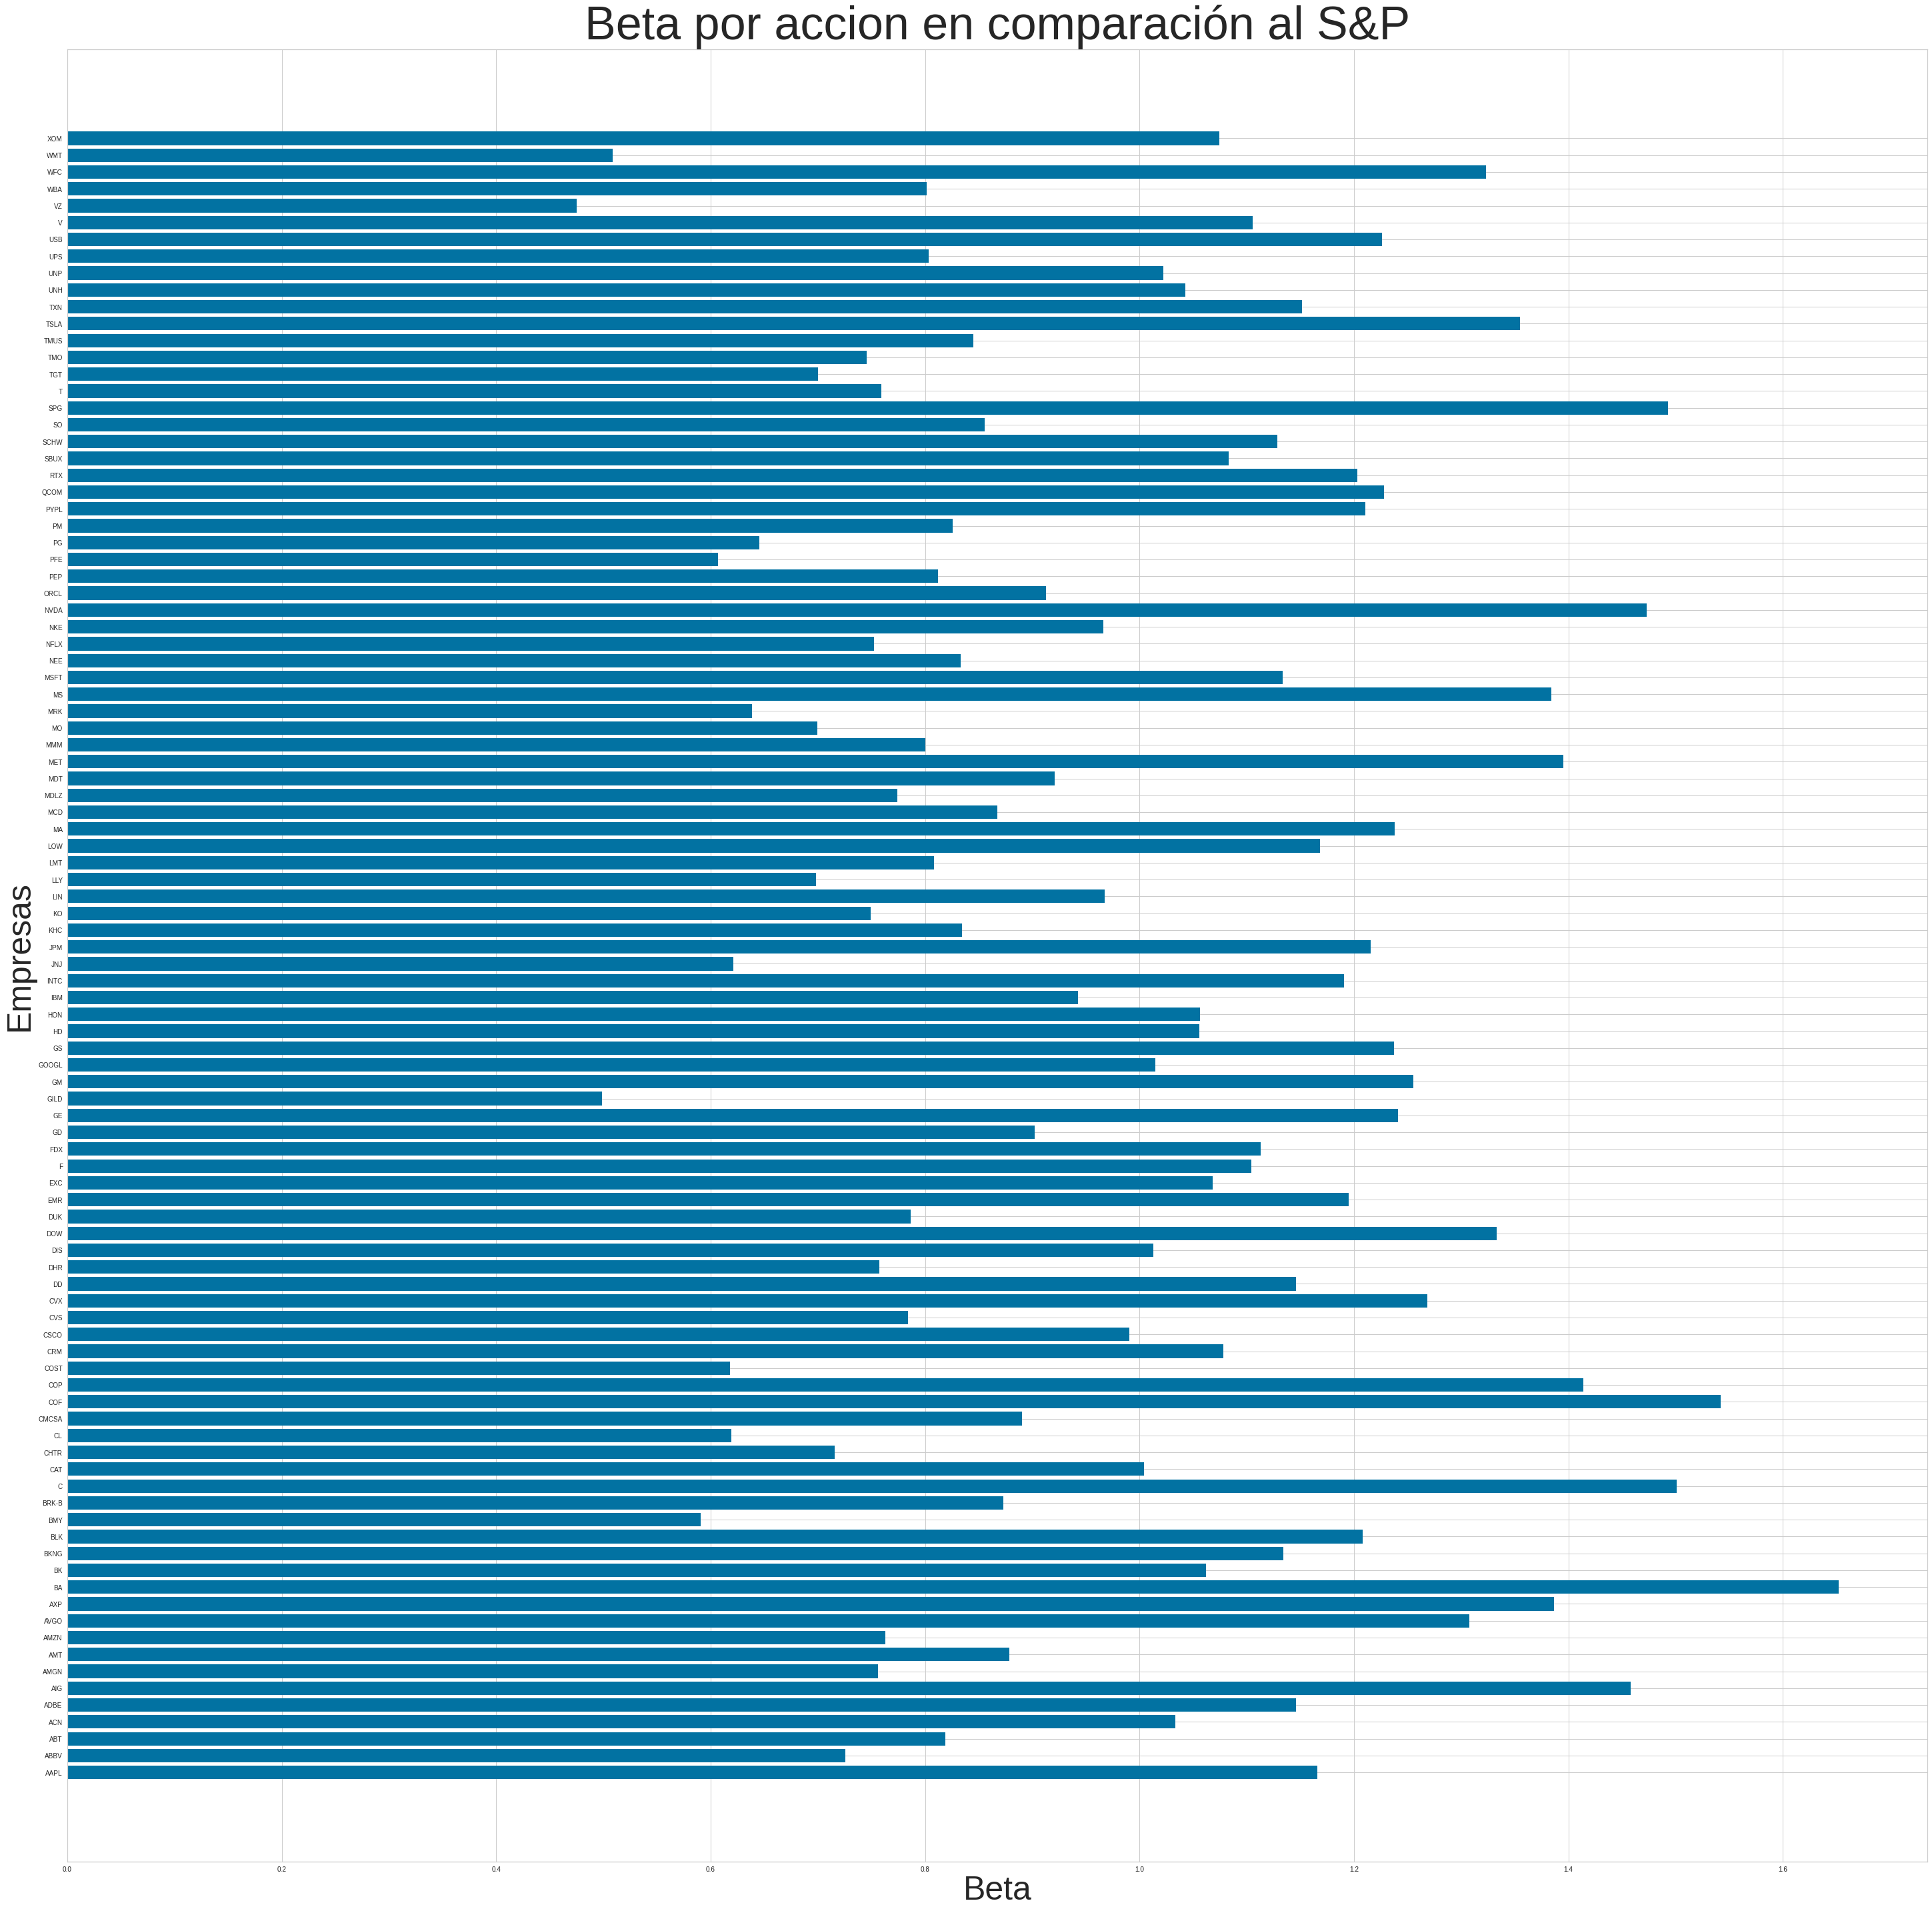

In [ ]:
parameters = {'axes.labelsize': 50,
          'axes.titlesize': 50}
plt.rcParams.update(parameters)
plt.figure(figsize=(50,50))
plt.barh(x["index"],x["Beta"])
plt.ylabel('Empresas',fontsize=50)
plt.xlabel('Beta',fontsize=50)
plt.title('Beta por accion en comparación al S&P',fontsize=70)
plt.show()

In [ ]:
dft=rets.transpose()
### first column data names
dft.columns = dft.iloc[0]
## drop the first row
dft.reset_index(inplace=True)
dft

AAPL,index,0.03683032856462143,-0.02070847312608526,-0.012091040218008331,-0.0103317008815772,0.008994260225247297,0.001326412461898574,0.006517497609566103,0.00679123951006444,0.014536767380209259,...,-0.03926385739530425,-0.006501766470589532,-0.00812203635435127,0.0190868627797387,0.015318809821480261,0.0036438855219382837,0.02297479771607791,-0.005767302267407071,0.0005020575141316819,-0.006578233562476665
0,AAPL,0.036830,-0.020708,-0.012091,-0.010332,0.008994,0.001326,0.006517,0.006791,0.014537,...,-0.039264,-0.006502,-0.008122,0.019087,0.015319,0.003644,0.022975,-0.005767,0.000502,-0.006578
1,ABBV,0.010071,-0.018217,-0.003135,0.015721,-0.010772,0.000876,0.007879,0.002358,0.028348,...,0.011902,-0.017074,0.010268,-0.006954,0.016160,0.007876,0.009918,-0.000149,0.007218,0.004211
2,ABT,0.001501,-0.026105,0.003335,0.009843,-0.003418,0.009018,0.006294,-0.003503,-0.000502,...,0.003910,0.007495,-0.015535,0.002149,0.027500,0.001223,0.016528,-0.006998,0.005125,-0.001346
3,ACN,0.011848,-0.017832,-0.000968,0.011267,-0.002815,0.051961,0.005139,0.001704,-0.005388,...,0.067413,-0.010884,-0.026398,0.018430,0.027489,-0.000941,0.029803,-0.000144,0.000361,-0.003828
4,ADBE,0.017094,-0.016996,0.009935,0.012659,-0.012237,0.004536,0.011232,0.021314,-0.003013,...,-0.101915,-0.016693,-0.012342,0.014097,0.011587,0.010000,0.014150,-0.014402,-0.000123,0.002178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,WBA,0.012900,-0.018711,-0.011537,0.003728,0.005006,0.004500,0.012158,0.003477,-0.128052,...,-0.008055,-0.008323,-0.000409,0.023141,0.009007,0.001389,0.004952,0.013799,0.015944,-0.004976
95,WFC,-0.010714,-0.031087,-0.004761,0.019343,-0.004897,0.006561,-0.015686,0.010141,-0.012293,...,0.027789,-0.046720,-0.022941,0.020491,0.004601,0.006871,0.008478,-0.007177,0.000620,-0.007224
96,WMT,0.004258,-0.007874,-0.001119,0.001528,-0.011290,-0.000823,0.004118,0.002973,-0.008996,...,-0.016670,-0.032022,0.003243,0.003017,0.001289,-0.002217,0.009105,0.014351,-0.000490,0.003223
97,XOM,0.005780,-0.016017,-0.006958,0.013013,-0.007658,0.004979,0.000743,0.011510,-0.004282,...,0.001632,-0.021835,-0.014493,0.022650,0.008099,0.000492,0.014258,-0.003232,-0.008753,-0.005887


In [ ]:
dft1=dft.merge(x, left_on='index', right_on='index')
dft1

,index,0.03683032856462143,-0.02070847312608526,-0.012091040218008331,-0.0103317008815772,0.008994260225247297,0.001326412461898574,0.006517497609566103,0.00679123951006444,0.014536767380209259,...,-0.006501766470589532,-0.00812203635435127,0.0190868627797387,0.015318809821480261,0.0036438855219382837,0.02297479771607791,-0.005767302267407071,0.0005020575141316819,-0.006578233562476665,Beta
0,AAPL,0.036830,-0.020708,-0.012091,-0.010332,0.008994,0.001326,0.006517,0.006791,0.014537,...,-0.006502,-0.008122,0.019087,0.015319,0.003644,0.022975,-0.005767,0.000502,-0.006578,1.165974
1,ABBV,0.010071,-0.018217,-0.003135,0.015721,-0.010772,0.000876,0.007879,0.002358,0.028348,...,-0.017074,0.010268,-0.006954,0.016160,0.007876,0.009918,-0.000149,0.007218,0.004211,0.725653
2,ABT,0.001501,-0.026105,0.003335,0.009843,-0.003418,0.009018,0.006294,-0.003503,-0.000502,...,0.007495,-0.015535,0.002149,0.027500,0.001223,0.016528,-0.006998,0.005125,-0.001346,0.818689
3,ACN,0.011848,-0.017832,-0.000968,0.011267,-0.002815,0.051961,0.005139,0.001704,-0.005388,...,-0.010884,-0.026398,0.018430,0.027489,-0.000941,0.029803,-0.000144,0.000361,-0.003828,1.033199
4,ADBE,0.017094,-0.016996,0.009935,0.012659,-0.012237,0.004536,0.011232,0.021314,-0.003013,...,-0.016693,-0.012342,0.014097,0.011587,0.010000,0.014150,-0.014402,-0.000123,0.002178,1.146200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,VZ,0.010751,0.025219,0.005355,0.009154,0.004123,-0.029566,0.000846,-0.000676,-0.009477,...,0.007962,-0.001505,-0.005839,-0.000189,-0.001705,0.000000,0.000759,-0.006828,-0.002101,0.474880
94,WBA,0.012900,-0.018711,-0.011537,0.003728,0.005006,0.004500,0.012158,0.003477,-0.128052,...,-0.008323,-0.000409,0.023141,0.009007,0.001389,0.004952,0.013799,0.015944,-0.004976,0.801603
95,WFC,-0.010714,-0.031087,-0.004761,0.019343,-0.004897,0.006561,-0.015686,0.010141,-0.012293,...,-0.046720,-0.022941,0.020491,0.004601,0.006871,0.008478,-0.007177,0.000620,-0.007224,1.323090
96,WMT,0.004258,-0.007874,-0.001119,0.001528,-0.011290,-0.000823,0.004118,0.002973,-0.008996,...,-0.032022,0.003243,0.003017,0.001289,-0.002217,0.009105,0.014351,-0.000490,0.003223,0.508962


In [ ]:
dft1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Columns: 704 entries, index to Beta
dtypes: float64(703), object(1)
memory usage: 539.8+ KB


In [ ]:
transformer = Normalizer().fit(dft1.iloc[:, 1:703]) 
transformer=transformer.transform(dft1.iloc[:, 1:703])
transformer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,


array([[ 0.06426005, -0.0361313 , -0.02109595, ..., -0.01006255,
         0.00087597, -0.01147743],
       [ 0.02147824, -0.03885288, -0.00668534, ..., -0.00031751,
         0.01539391,  0.00898084],
       [ 0.00315401, -0.05485714,  0.00700732, ..., -0.01470617,
         0.01077061, -0.00282765],
       ...,
       [-0.01482557, -0.04301617, -0.00658764, ..., -0.00993052,
         0.00085748, -0.00999611],
       [ 0.01124412, -0.020793  , -0.00295609, ...,  0.03789669,
        -0.0012943 ,  0.00851184],
       [ 0.00921284, -0.02553124, -0.0110917 , ..., -0.00515117,
        -0.01395329, -0.00938437]])

In [ ]:
def plot_elbow(kmeans_dict, elbow=None, w=11, h=5):
    plt.figure(figsize = (w,h))
    if elbow is not None:
        plt.axvline(x=elbow, linestyle='-.', c="black")
    plt.plot([k for k in kmeans_dict.keys()], [km.inertia_ for km in kmeans_dict.values()], '-o');
    ax = plt.gca()
    ax.tick_params('both', labelsize=(w+h)/2)
    ax.set_xlabel('K', fontsize=w)
    ax.set_ylabel("Inertia", fontsize=w)
    plt.show()

In [ ]:
kmeans_sweep = {k : KMeans(n_clusters = k, random_state=1).fit(transformer) for k in range(1,10)}

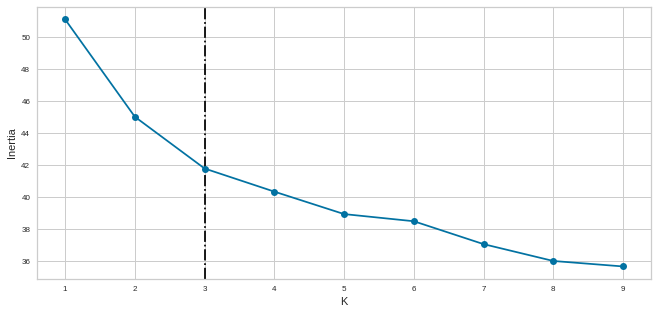

In [ ]:
plot_elbow(kmeans_sweep, elbow=3)

In [ ]:
pipeline = make_pipeline(Normalizer(), KMeans(n_clusters=3,random_state=1))
pipeline.fit(dft1.iloc[:, 1:702])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=3, random_state=1))])

In [ ]:
# Predict the cluster labels: labels
labels = pipeline.predict(dft1.iloc[:, 1:702])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
pca = PCA(n_components=1) 
pca.fit(transformer)
data_stocks= pd.DataFrame(pca.transform(transformer), columns=['retornos'])
data_stocks

,retornos
0,0.314729
1,0.143982
2,0.372654
3,0.089848
4,0.449852
...,...
93,0.120103
94,-0.069530
95,-0.393263
96,0.417258


Text(0, 0.5, 'Beta')

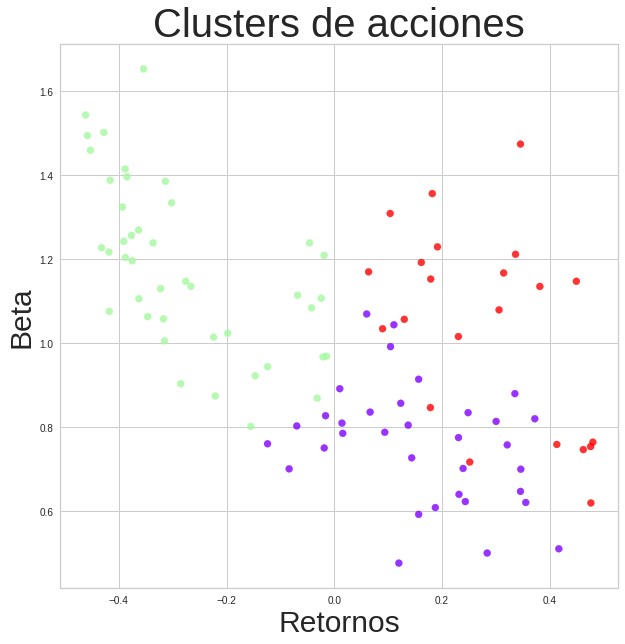

In [ ]:
import matplotlib.cm as cm
clusters = labels
### plot the clusters
### fig size 20 20
fig = plt.figure(figsize=(10,10))
plt.scatter(data_stocks['retornos'], dft1['Beta'], c=clusters, cmap=cm.get_cmap('rainbow', 8), alpha=0.8)
### tittle with size 10
plt.title('Clusters de acciones', size=40)
### axis labels with size 30
plt.xlabel('Retornos', size=30)
plt.ylabel('Beta', size=30)


In [ ]:
## get the stock names from the cluster stock names and cluster
### names to cluster using rownames from dft
cluster_names = dft1.index.tolist()
### clusters as pandas data frame
clusters_df = pd.DataFrame(clusters, index=cluster_names)

In [ ]:
### data frame  of the clusters
clusters_df = pd.DataFrame(clusters, index=dft1.index)
# rename column with cluster
clusters_df.columns = ['Cluster']

Text(0, 0.5, 'Numero de aaciones')

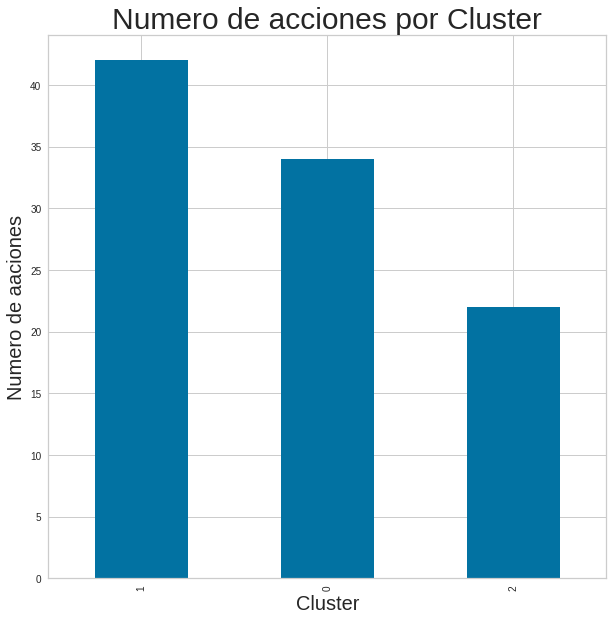

In [ ]:
###  count the times of each cluster
freq=clusters_df['Cluster'].value_counts()
## barplot of freq
### fig size 20 20
fig = plt.figure(figsize=(10,10))
freq.plot(kind='bar')
### tittle with size 10
plt.title('Numero de acciones por Cluster', size=30)
## size ticks axis labels with size 30
plt.xlabel('Cluster', size=20)
plt.ylabel('Numero de aaciones', size=20)

In [ ]:
clusters_df = clusters_df.join(dft1)

In [ ]:
cluster_0 = clusters_df[clusters_df['Cluster'] == 0]
cluster_1 = clusters_df[clusters_df['Cluster'] == 1]
cluster_2 = clusters_df[clusters_df['Cluster'] == 2]

In [ ]:
cluster_0

,Cluster,index,0.03683032856462143,-0.02070847312608526,-0.012091040218008331,-0.0103317008815772,0.008994260225247297,0.001326412461898574,0.006517497609566103,0.00679123951006444,...,-0.006501766470589532,-0.00812203635435127,0.0190868627797387,0.015318809821480261,0.0036438855219382837,0.02297479771607791,-0.005767302267407071,0.0005020575141316819,-0.006578233562476665,Beta
1,0,ABBV,0.010071,-0.018217,-0.003135,0.015721,-0.010772,0.000876,0.007879,0.002358,...,-0.017074,0.010268,-0.006954,0.016160,0.007876,0.009918,-0.000149,0.007218,0.004211,0.725653
2,0,ABT,0.001501,-0.026105,0.003335,0.009843,-0.003418,0.009018,0.006294,-0.003503,...,0.007495,-0.015535,0.002149,0.027500,0.001223,0.016528,-0.006998,0.005125,-0.001346,0.818689
6,0,AMGN,0.004029,-0.027047,-0.000589,0.009003,-0.010357,0.007138,0.012417,0.009422,...,-0.000359,-0.011281,0.004227,0.002761,0.010202,0.006167,0.002665,0.008106,-0.004965,0.756435
7,0,AMT,0.016550,-0.005444,0.010534,-0.003270,-0.004922,0.004328,0.010927,-0.023089,...,-0.002183,-0.001434,-0.002191,0.012237,-0.004002,0.025185,0.009553,0.001352,0.007823,0.878552
15,0,BMY,-0.005489,-0.015535,-0.013912,0.017898,-0.007447,-0.002918,-0.002718,-0.012995,...,-0.009812,0.002599,-0.004375,0.010578,-0.000805,0.003868,0.000963,-0.000962,0.003692,0.590940
20,0,CL,0.011058,0.002582,0.003939,0.009961,0.001345,0.005372,0.017367,-0.003501,...,-0.017510,0.000485,-0.005211,0.004507,0.004002,0.013528,0.006555,0.005328,-0.003769,0.619269
21,0,CMCSA,0.014695,-0.014732,-0.007096,0.011486,0.014635,0.005223,-0.010886,0.008254,...,-0.001843,-0.007179,0.009504,0.003479,0.020396,0.008795,0.000793,0.001584,0.000000,0.890344
26,0,CSCO,0.012768,-0.022247,-0.000190,0.009482,-0.001691,0.004140,0.011807,0.018337,...,0.002487,-0.001654,0.011100,0.008193,0.012189,0.018304,0.001734,0.006768,-0.005316,0.990469
27,0,CVS,0.022080,-0.023693,-0.019450,0.008007,-0.024192,-0.012766,0.010682,0.004821,...,-0.008496,-0.000399,0.004685,0.001091,0.004063,0.010759,0.003613,0.009049,-0.000193,0.783987
33,0,DUK,0.005930,0.008786,0.000772,0.008373,-0.011472,-0.012157,0.006937,-0.008000,...,-0.014349,0.006114,-0.006270,0.001359,-0.001842,0.003108,0.012392,0.001817,0.000286,0.786454


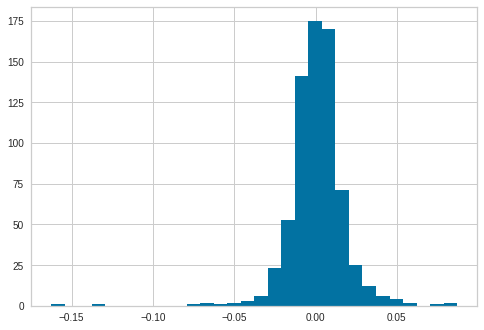

In [ ]:
rets['ABBV'].hist(bins=30)

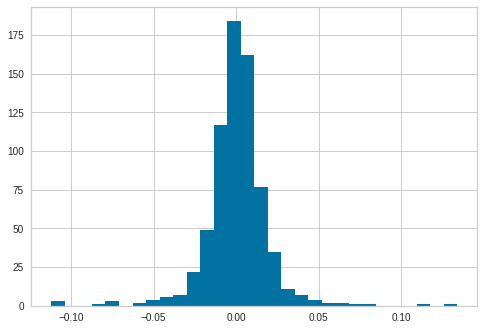

In [ ]:
rets['CSCO'].hist(bins=30)

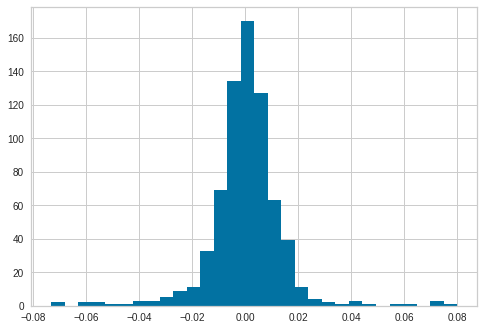

In [ ]:
rets['JNJ'].hist(bins=30)

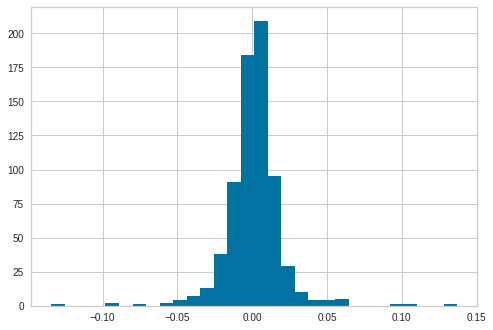

In [ ]:
rets['NEE'].hist(bins=30)

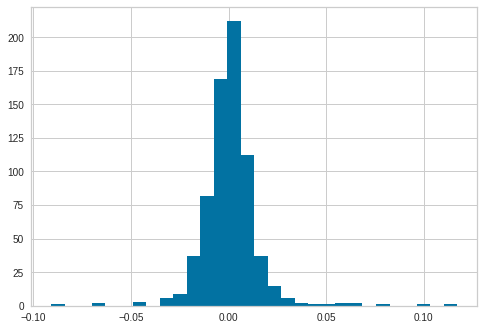

In [ ]:
rets['WMT'].hist(bins=30)

Cluster 0

Luego del análisis generado para los riesgos y retornos de los activos financieros evidenciamos que los clústeres, en general, tienen una distribución normal y no tienen un sesgo importante hacia la derecha. Esta asimila un riesgo bajo con un retorno bajo, ideal para inversionistas aversos al riesgo.


In [ ]:
cluster_1

,Cluster,index,0.03683032856462143,-0.02070847312608526,-0.012091040218008331,-0.0103317008815772,0.008994260225247297,0.001326412461898574,0.006517497609566103,0.00679123951006444,...,-0.006501766470589532,-0.00812203635435127,0.0190868627797387,0.015318809821480261,0.0036438855219382837,0.02297479771607791,-0.005767302267407071,0.0005020575141316819,-0.006578233562476665,Beta
5,1,AIG,0.010941,-0.018651,-0.003989,0.014134,0.002091,-0.000927,-0.000928,0.021598,...,-0.021165,-0.022177,0.042147,0.002358,0.023521,0.005833,-0.004042,0.001941,-0.000704,1.458130
10,1,AXP,0.009479,-0.021105,-0.003837,0.004218,-0.004749,0.001652,0.001283,0.021958,...,-0.018344,-0.025748,0.032202,0.009695,0.010587,0.001218,0.000122,-0.003528,0.002014,1.386782
11,1,BA,-0.009198,-0.028253,0.022890,-0.000216,0.010341,0.000615,0.018641,0.026532,...,0.009644,-0.021544,0.058574,0.010876,0.012544,-0.005142,0.014569,-0.011983,-0.004665,1.652036
12,1,BK,-0.001731,-0.026788,-0.004356,0.011138,-0.014555,0.005788,0.000794,0.020424,...,-0.015748,-0.017739,0.024965,0.000345,0.003454,0.007056,-0.001025,-0.001539,-0.006853,1.061806
13,1,BKNG,-0.000039,-0.029740,0.017890,0.009404,-0.009475,-0.013253,0.009266,0.008207,...,0.021040,-0.000774,0.071081,0.008213,0.007157,-0.003222,-0.003174,-0.000934,0.004713,1.134182
14,1,BLK,0.001023,-0.030207,-0.004672,0.017477,-0.007169,0.012701,0.005647,0.025786,...,-0.008659,-0.017820,0.015134,0.000736,0.002611,0.009465,-0.000813,-0.013126,0.004441,1.208006
16,1,BRK-B,0.005707,-0.018980,-0.005535,0.005917,-0.007028,0.007279,0.001146,0.020459,...,-0.021688,-0.013792,0.012534,0.003990,0.000272,0.007403,0.005461,0.003922,0.001737,0.872888
17,1,C,-0.006065,-0.045846,-0.010659,0.014752,-0.008004,0.020583,0.003872,0.034394,...,-0.025053,-0.021162,0.018874,0.003705,0.010235,0.007308,-0.000495,-0.001320,-0.001817,1.500666
18,1,CAT,0.007894,-0.032001,0.012407,0.003501,-0.004854,0.008918,0.023570,0.035132,...,-0.023282,-0.029349,0.014581,0.019364,0.020035,0.000873,0.001163,0.003436,-0.006029,1.004324
22,1,COF,-0.000723,-0.034866,-0.008000,0.016381,-0.007315,0.011115,0.009017,0.034153,...,-0.026618,-0.039769,0.037297,0.001533,0.009532,0.005444,0.002125,-0.004172,-0.000687,1.542309


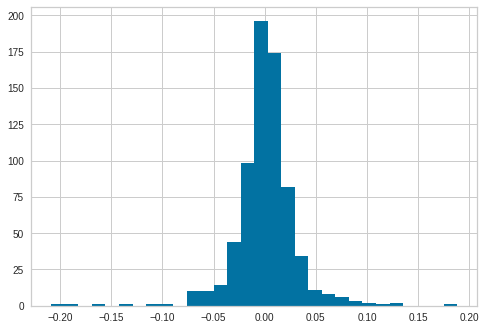

In [ ]:
rets['AIG'].hist(bins=30)

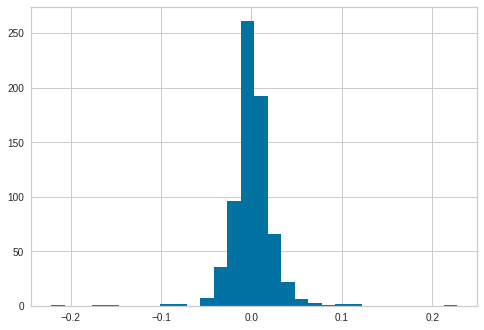

In [ ]:
rets['CVX'].hist(bins=30)

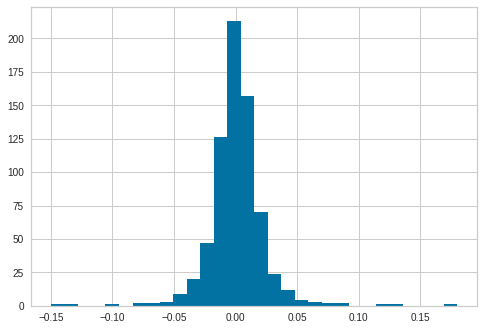

In [ ]:
rets['JPM'].hist(bins=30)

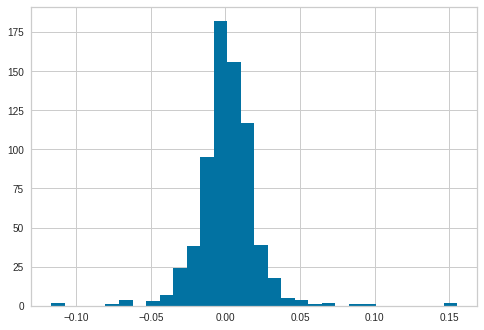

In [ ]:
rets['NKE'].hist(bins=30)

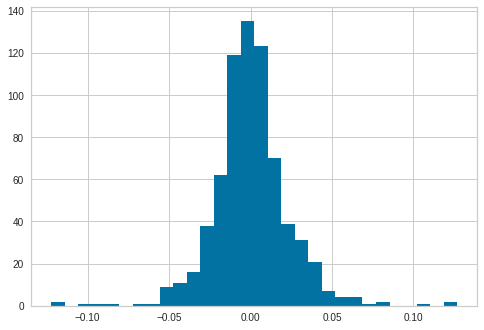

In [ ]:
rets['XOM'].hist(bins=30)

Cluster 1

Por otra parte, en esta grafica se evidencia que tiene un sesgo más definido hacia la derecha en términos de retornos, lo cual asimila un riesgo medio con un retorno medio, ideal para inversionistas cuya preferencia al riesgo es neutral.


In [ ]:
cluster_2

,Cluster,index,0.03683032856462143,-0.02070847312608526,-0.012091040218008331,-0.0103317008815772,0.008994260225247297,0.001326412461898574,0.006517497609566103,0.00679123951006444,...,-0.006501766470589532,-0.00812203635435127,0.0190868627797387,0.015318809821480261,0.0036438855219382837,0.02297479771607791,-0.005767302267407071,0.0005020575141316819,-0.006578233562476665,Beta
0,2,AAPL,0.036830,-0.020708,-0.012091,-0.010332,0.008994,0.001326,0.006517,0.006791,...,-0.006502,-0.008122,0.019087,0.015319,0.003644,0.022975,-0.005767,0.000502,-0.006578,1.165974
3,2,ACN,0.011848,-0.017832,-0.000968,0.011267,-0.002815,0.051961,0.005139,0.001704,...,-0.010884,-0.026398,0.018430,0.027489,-0.000941,0.029803,-0.000144,0.000361,-0.003828,1.033199
4,2,ADBE,0.017094,-0.016996,0.009935,0.012659,-0.012237,0.004536,0.011232,0.021314,...,-0.016693,-0.012342,0.014097,0.011587,0.010000,0.014150,-0.014402,-0.000123,0.002178,1.146200
8,2,AMZN,0.012235,-0.029952,0.005377,0.005354,-0.010125,0.004372,0.004133,0.018779,...,0.006789,-0.017284,0.019979,0.003638,0.000184,-0.008178,0.005844,-0.008555,-0.003289,0.762955
9,2,AVGO,0.019826,-0.013983,-0.001674,0.016669,-0.003569,0.010474,0.005484,0.016894,...,0.023007,0.015859,0.008285,0.013865,0.014652,0.014260,-0.007831,0.005396,-0.011195,1.307646
19,2,CHTR,0.010567,-0.014989,-0.010921,-0.002270,-0.001461,-0.007426,-0.016890,-0.001989,...,0.029165,-0.004985,-0.003757,-0.007046,0.013301,0.006247,0.005273,0.000747,0.001447,0.715608
24,2,COST,0.010803,-0.008266,-0.002484,0.008862,0.001422,0.007560,0.003814,0.008466,...,-0.009084,0.001735,-0.005706,0.007774,0.001274,0.023802,0.002077,0.005543,-0.006799,0.618135
25,2,CRM,0.021038,-0.032644,-0.003839,-0.009199,-0.026851,0.000387,0.020557,0.017743,...,-0.000751,-0.022615,0.021601,0.000990,0.001345,0.020384,-0.011034,-0.003562,0.003104,1.078002
30,2,DHR,0.019654,-0.019654,-0.001773,0.012513,-0.010223,0.002084,0.016790,-0.001515,...,-0.015950,0.002808,-0.001177,0.018349,0.003472,0.020637,-0.012125,0.010364,0.005787,0.757503
42,2,GOOGL,0.007909,-0.023040,-0.008504,-0.006297,-0.009942,-0.004873,0.003941,0.018770,...,-0.018831,-0.000833,0.013174,0.020509,0.003425,0.006738,-0.008245,-0.000218,-0.003099,1.014560


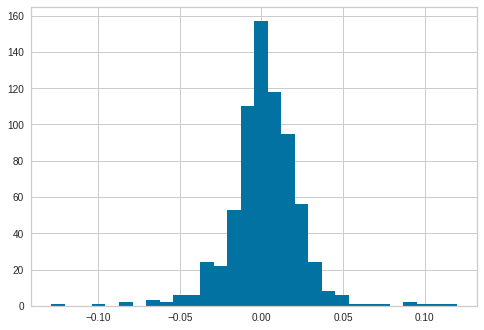

In [ ]:
rets['AAPL'].hist(bins=30)

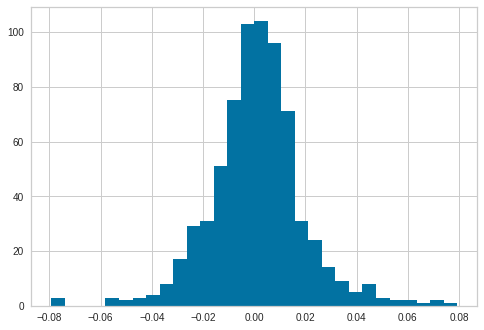

In [ ]:
rets['AMZN'].hist(bins=30)

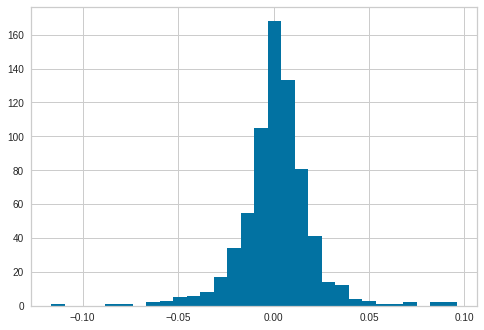

In [ ]:
rets['GOOGL'].hist(bins=30)

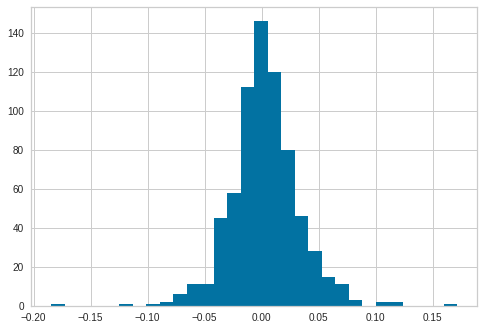

In [ ]:
rets['NVDA'].hist(bins=30)

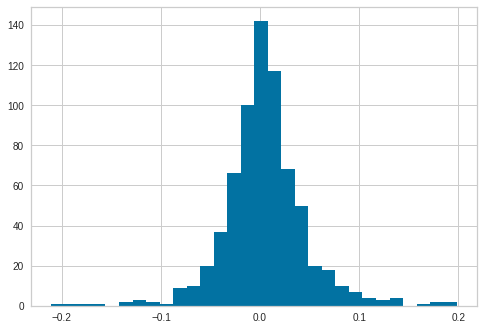

In [ ]:
rets['TSLA'].hist(bins=30)

Cluster 2


Por último, nos evidencia un sesgo mucho mas alto hacia la derecha, con una particularidad de riesgo alto, pero así mismo, un retorno alto para aquellos inversionistas amantes del riesgo.
